Problem statement

The data scientists at Big Mart have collected sales data for 1559 products across ten stores in diff cities.
A certain attribute of each product and store have been defined.
The aim is to build a predictive model and find the sales figures of each product at a particular store

Factors that could affect the target variable "sales"
1. Time of the weeek
2. Time of the day
3. Time of the year
4. Store size and Location
5. The item itself being sold

Import the Required Libraries

In [166]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
#import Linear regression library from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline


Load the train and test data set

In [167]:
train = pd.read_csv('bigmart_train.csv')
test = pd.read_csv('bigmart_test.csv')

check the number of rows and columns in the train dataset

In [168]:
train.shape

(8523, 12)

Print the names of columns in train dataset

In [169]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

check the number of rows and columns in the test data set

In [170]:
test.shape

(5681, 11)

print the names of columns in test data set

In [171]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

create a new column source

In [172]:
train['source'] = 'train'
test['source'] = 'test'

combine test and train into one file to perform EDA

In [173]:
data1 = pd.concat([train,test], ignore_index=True)
print(data1.shape)

(14204, 13)


In [174]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [175]:
data1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [176]:
data1.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [177]:
data1["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [178]:
data1["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

Date ranges from 1985 to 2009

Calculate the Outlet Age

In [179]:
data1["Outlet_Age"] = 2018-data1["Outlet_Establishment_Year"]
data1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [180]:
data1["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

Column contains missing value

In [181]:
data1["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

We can see that low fat products are the most abadoned

In [182]:
data1["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

we can see that MEDIUM AND SMALL SCALE Outlets are the majority

In [183]:
#using the mode value to find out most common value in Outlet_size
data1["Outlet_Size"].mode()[0]

'Medium'

We can see that Medium is the most common occuring value

Replace missing values in Outlet_size with value "medium"(mode)

In [184]:
data1["Outlet_Size"] = data1["Outlet_Size"].fillna(data1["Outlet_Size"].mode()[0])

replace missing values in Item_weight with mean weight

In [185]:
data1["Item_Weight"] = data1["Item_Weight"].fillna(data1["Item_Weight"].mean())

plotting hist to investgate the distribution of Item_Visibility column

<AxesSubplot:>

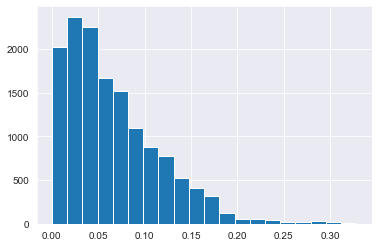

In [186]:
data1["Item_Visibility"].hist(bins=20)

Detecting Outliers
An Outliner is a data point that lies outside the overall pattern in a distribution
data points more than 1.5*IQR above the third quaryile and below the first quartile
Remoce Outliers

In [187]:
#calc the first quantile for item_visibility
Q1 = data1["Item_Visibility"].quantile(0.25)

In [188]:
#Calc the second quantile
Q3 = data1["Item_Visibility"].quantile(0.75)

In [189]:
#calc the interquantile range(IQR)
IQR = Q3 - Q1

Now that the IQR range is Known,We can remove Outliers

In [190]:
fill_data = data1.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 +1.5 * @IQR)')

In [191]:
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [192]:
fill_data.shape

(13943, 14)

In [193]:
data1.shape

(14204, 14)

Assign the fill_data dataset to data1 dataframe

In [194]:
data1 = fill_data

modify the Item_visibilty by converting numerical variables to categorical values

In [195]:
data1["Item_Visibility_bins"] = pd.cut(data1["Item_Visibility"], [0.000, 0.065, 0.13,0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [196]:
data1["Item_Visibility_bins"].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

Replace Null values with low Viz because its the highest most occuring

In [197]:
data1["Item_Visibility_bins"] = data1["Item_Visibility_bins"].replace(np.nan, "Low Viz", regex = True)

typos and differences in representation were found in Item_Fat content variable

In [198]:
data1["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [199]:
#replace all other representationns of low fat with Low fat
data1["Item_Fat_Content"] = data1["Item_Fat_Content"].replace(["low fat","LF"], "Low Fat")

In [200]:
#replace alll representation of reg eith Regular
data1["Item_Fat_Content"] = data1["Item_Fat_Content"].replace("reg", "Regular")

In [201]:
data1["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

Encode all categorical variables as numeric using 'LabelEncoder' from sklearn preprocessing module

In [202]:
#Initialize label encoder
label_Encod = LabelEncoder()

In [203]:
#Transform Item_Fat_Content
data1["Item_Fat_Content"] = label_Encod.fit_transform(data1["Item_Fat_Content"])

In [204]:
#transform Item_Visibility_bins
data1["Item_Visibility_bins"] = label_Encod.fit_transform(data1["Item_Visibility_bins"])

In [205]:
#transform outlet size
data1["Outlet_Size"] = label_Encod.fit_transform(data1["Outlet_Size"])

In [206]:
#ttransform Outlet_location_Type
data1["Outlet_Location_Type"] = label_Encod.fit_transform(data1["Outlet_Location_Type"])

In [207]:
#print unique values of outlet type
data1["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [208]:
#create dummies for Outlet_Type
dummy = pd.get_dummies(data1["Outlet_Type"])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [209]:
#explore the column identifier
data1["Item_Identifier"]

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [210]:
data1["Item_Identifier"].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

As there are multiple values of food,non-consumable items and drinks with different numbers,combine the item type

In [211]:
data1["Item_Type_Combined"] = data1["Item_Identifier"].apply(lambda x:x[0:2])
data1["Item_Type_Combined"] = data1["Item_Type_Combined"].map({'FD': 'Food',
                                                               'NC': 'Non-Consumable',
                                                               'DR': 'Drinks'})

In [212]:
data1["Item_Type_Combined"].value_counts()

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

Only 3 categories are present in the items_combined

In [213]:
data1.shape

(13943, 16)

Performing one-hot coding for all columns as the model works on numerical values and not categorical values

In [214]:
data1 = pd.get_dummies(data1, columns=["Item_Fat_Content","Outlet_Location_Type","Outlet_Size", "Outlet_Type", "Item_Type_Combined"])

In [215]:
data1.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Typ

The categorical columns are mentioned as objects


In [216]:
import warnings
warnings.filterwarnings('ignore')

#Drop the columns which has been converted to different types
data1.drop(["Item_Type","Outlet_Establishment_Year"], axis=1, inplace=True)

#split the data set created into train and test data set
train = data1.loc[data1["source"] == "train"]
test = data1.loc[data1["source"] == "test"]

#drop unnecessary columns
test.drop(["Item_Outlet_Sales", "source"], axis=1, inplace=True)
train.drop(["source"], axis=1, inplace=True)

#Export modified versions of the files
train.to_csv("train_mod.csv", index = False)
test.to_csv("test_mod.csv", index = False)

In [217]:
#load the new train and test data set
train2 = pd.read_csv("train_mod.csv")
test2 = pd.read_csv("test_mod.csv")

In [218]:
#print the data dtypes of train2 column
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_

In [219]:
#drop the irrelevant variables from the test2 dataset
#create the independent variable X_train and the dependent variable y_train
X_train = train2.drop(["Item_Outlet_Sales", "Outlet_Identifier", "Item_Identifier"], axis =1)
y_train = train2.Item_Outlet_Sales

In [220]:
#drop those irrelevant variables from test2
X_test = test2.drop(["Outlet_Identifier", "Item_Identifier"], axis =1)

In [221]:
X_test.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.75,0.007565,107.8622,19,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,8.30,0.038428,87.3198,11,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0


In [222]:
y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [223]:
#import sklearn libraries
from sklearn import model_selection
from sklearn.linear_model import LinearRegression



In [224]:
#create a train and test split
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [225]:
#fit linear regression to the training dataset
lin =LinearRegression()

In [226]:
lin.fit(xtrain,ytrain)

LinearRegression()

In [227]:
#find the coefficient and intercept of the line
#use xtrain and ytrain for linear regression
print(lin.coef_)
lin.intercept_

[-1.93054423e+00 -3.47449893e+02  1.58788136e+01 -3.19310190e+01
 -4.64698319e+00 -1.55426303e+00  1.55426303e+00  1.88969149e+02
  4.83874237e+01 -2.37356573e+02  5.39972452e+02 -3.11545503e+02
 -2.28426949e+02 -1.63452944e+03 -1.26820412e+02 -3.48655405e+02
  2.11000526e+03  9.06454503e+00  3.46403369e+01 -4.37048820e+01]


946.4212171360878

In [228]:
#predict the test set results of training data
predictions = lin.predict(xtest)
predictions

array([2077.92386202, 3704.93216108, 2961.28180591, ..., 3541.28725867,
       3464.78656382, 1249.59368407])

In [229]:
#find the RMSE for the model
import math
print(math.sqrt(mean_squared_error(ytest,predictions)))

1126.2352692434754


In [230]:
#A good RMSE for this problem is 1130,we can improve the RMSE by using algorithms like decision tree,randorm forest and XGboost

In [231]:
y_sales_pred = lin.predict(X_test)
y_sales_pred

array([1788.81075495, 1593.90875193, 1845.79649796, ..., 1831.65421972,
       3605.8573969 , 1284.78769015])

In [236]:
test_predictions = pd.DataFrame({
                                'Item_Identifier': test2['Item_Identifier'],
                                 'Outlet_Identifier': test2['Outlet_Identifier'],
                                 'Item_Outlet_Sales': y_sales_pred                                         }, columns = ['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])

In [237]:
test_predictions

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1788.810755
1,FDW14,OUT017,1593.908752
2,NCN55,OUT010,1845.796498
3,FDQ58,OUT017,2675.927968
4,FDY38,OUT027,5134.091429
...,...,...,...
5563,FDB58,OUT046,2360.100059
5564,FDD47,OUT018,2419.143609
5565,NCO17,OUT045,1831.654220
5566,FDJ26,OUT017,3605.857397


I made a Hypothesis about the data without looking at it

Explored the data and found some nuances in the data which required remediation

performed data cleaning and feature engineering and inputed missing values and solved other irregularities

Made new features and also made the data model friendly using one-hot encoding

Built the regression model